In [1]:
import nibabel as nib
import numpy as np
import tables
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import SimpleITK as sitk
import glob
import scipy.misc
from skimage import exposure, img_as_float#, #data

plt.rcParams['image.cmap'] = 'gist_earth'
from PIL import Image



In [2]:
from tf_unet import image_util
from tf_unet import unet
from tf_unet import util
from tf_unet.image_util import ImageDataProvider

In [3]:
class bggenerator(ImageDataProvider):
    n_class = 3   
    def _load_file(self, path, dtype=np.float32):
        img = nib.load(path)
        data = img.get_data()[...,0,0]
        if np.max(data) != 1:
            data = img_as_float(data)
            data = exposure.equalize_adapthist(data, clip_limit=0.01, nbins=256)
            #data = exposure.equalize_hist(data, nbins=4096)        
            #data =data * 4096
        #data = scipy.misc.imresize(data,[472,760], interp='bilinear', mode=None)
        data = np.pad(data,20,'constant')
        data = np.rot90(data)
        #print (path)
        #print (type(data))
        #print (data.shape)
        return np.array(data, dtype)    

In [4]:
generator = bggenerator("C:/Users/Tony2/brain_seg_mult/data/*/*.hdr","DeepCorT1.hdr","DeepBinary.hdr")
x_test, y_test = generator(1)

#print (generator(2)[1].shape)
#print (generator(2)[0].shape)
#print (np.max(generator(22)[1]))
print(x_test.shape, y_test.shape)


very large origin values relative to dims; leaving as set, ignoring for affine
2017-09-25 09:13:01,335 very large origin values relative to dims; leaving as set, ignoring for affine
very large origin values relative to dims; leaving as set, ignoring for affine
2017-09-25 09:13:01,340 very large origin values relative to dims; leaving as set, ignoring for affine
E:\Programming_Files\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
very large origin values relative to dims; leaving as set, ignoring for affine
2017-09-25 09:13:01,359 very large origin values relative to dims; leaving as set, ignoring for affine
very large origin values relative to dims; leaving as set, ignoring for affine
2017-09-25 09:13:01,361 very large origin values relative to dims; leaving as set, ignoring for affine
very large origin values relative to dims; leaving as set, ignoring for affine
201

Number of files entries used: 26
(1, 120, 88, 1) (1, 120, 88, 3)


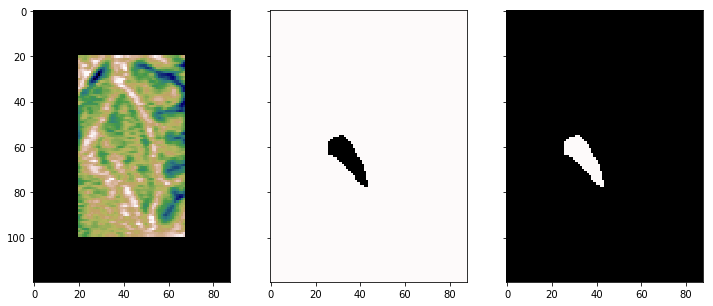

In [5]:
fig, ax = plt.subplots(1,3, sharey=True, figsize=(12,5))
ax[0].imshow(x_test[0,...,0], aspect="auto")
ax[1].imshow(y_test[0,...,0], aspect="auto")
ax[2].imshow(y_test[0,...,1], aspect="auto")

In [6]:
#features used to be 16
net = unet.Unet(channels=generator.channels, n_class=generator.n_class, layers=3, features_root=128)

2017-09-25 09:13:01,790 Layers 3, features 128, filter size 3x3, pool size: 2x2


In [7]:
trainer = unet.Trainer(net)#,optimizer = "adam",opt_kwargs = dict(adam=0.01))#, optimizer="adam", opt_kwargs=dict(adam=0.01))
#trainer = unet.Trainer(net, optimizer="momentum", opt_kwargs=dict(momentum=0.2))

In [8]:
#dropout = 0.75
path = trainer.train(generator, "./unet_trained", training_iters=100, epochs=1000, dropout = 0.5, display_step=50, restore = True)

optimizer: adams
restore
restore ckpt ./unet_trained\model.cpkt
INFO:tensorflow:Restoring parameters from ./unet_trained\model.cpkt


2017-09-25 09:13:07,931 Restoring parameters from ./unet_trained\model.cpkt


InvalidArgumentError: Assign requires shapes of both tensors to match. lhs shape= [256] rhs shape= [512]
	 [[Node: save/Assign_25 = Assign[T=DT_FLOAT, _class=["loc:@Variable_16"], use_locking=true, validate_shape=true, _device="/job:localhost/replica:0/task:0/gpu:0"](Variable_16/Adam, save/RestoreV2_25/_43)]]

Caused by op 'save/Assign_25', defined at:
  File "E:\Programming_Files\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "E:\Programming_Files\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "E:\Programming_Files\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "E:\Programming_Files\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "E:\Programming_Files\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "E:\Programming_Files\Anaconda3\lib\site-packages\zmq\eventloop\ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "E:\Programming_Files\Anaconda3\lib\site-packages\tornado\ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "E:\Programming_Files\Anaconda3\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "E:\Programming_Files\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "E:\Programming_Files\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "E:\Programming_Files\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "E:\Programming_Files\Anaconda3\lib\site-packages\tornado\stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "E:\Programming_Files\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "E:\Programming_Files\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "E:\Programming_Files\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "E:\Programming_Files\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "E:\Programming_Files\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "E:\Programming_Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "E:\Programming_Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "E:\Programming_Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-8-6a98bcfa1dcd>", line 2, in <module>
    path = trainer.train(generator, "./unet_trained", training_iters=100, epochs=1000, dropout = 0.5, display_step=50, restore = True)
  File "C:\Users\Tony2\brain_seg_mult\tf_unet\unet.py", line 456, in train
    self.net.restore(sess, ckpt.model_checkpoint_path)
  File "C:\Users\Tony2\brain_seg_mult\tf_unet\unet.py", line 303, in restore
    saver = tf.train.Saver()
  File "E:\Programming_Files\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 1139, in __init__
    self.build()
  File "E:\Programming_Files\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 1170, in build
    restore_sequentially=self._restore_sequentially)
  File "E:\Programming_Files\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 691, in build
    restore_sequentially, reshape)
  File "E:\Programming_Files\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 419, in _AddRestoreOps
    assign_ops.append(saveable.restore(tensors, shapes))
  File "E:\Programming_Files\Anaconda3\lib\site-packages\tensorflow\python\training\saver.py", line 155, in restore
    self.op.get_shape().is_fully_defined())
  File "E:\Programming_Files\Anaconda3\lib\site-packages\tensorflow\python\ops\state_ops.py", line 271, in assign
    validate_shape=validate_shape)
  File "E:\Programming_Files\Anaconda3\lib\site-packages\tensorflow\python\ops\gen_state_ops.py", line 45, in assign
    use_locking=use_locking, name=name)
  File "E:\Programming_Files\Anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "E:\Programming_Files\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 2506, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "E:\Programming_Files\Anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 1269, in __init__
    self._traceback = _extract_stack()

InvalidArgumentError (see above for traceback): Assign requires shapes of both tensors to match. lhs shape= [256] rhs shape= [512]
	 [[Node: save/Assign_25 = Assign[T=DT_FLOAT, _class=["loc:@Variable_16"], use_locking=true, validate_shape=true, _device="/job:localhost/replica:0/task:0/gpu:0"](Variable_16/Adam, save/RestoreV2_25/_43)]]


In [ ]:
x_test, y_test = generator(1)
prediction = net.predict("./unet_trained/model.cpkt", x_test)


In [ ]:
print (x_test.shape)
#print(x_test.shape, y_test.shape)
plt.imshow(x_test[0,...,0],aspect = 'auto')

In [ ]:
print (prediction.shape)
print (np.min(prediction))
print (np.max(prediction))
mask = prediction[0,:,:,1] 
plt.imshow(mask,aspect = 'auto')

In [ ]:
mask = scipy.misc.imresize(prediction[0,:,:,1],[48,80], interp='bilinear', mode=None)
print (np.min(mask))
print (np.max(mask))
print (np.max(prediction[0,:,:,1]))

print(mask.shape)
mask = mask > 0.97 * np.max(mask)

fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(12,5))
ax[0].imshow(x_test[0,...,0], aspect="auto")
ax[1].imshow(y_test[0,...,1], aspect="auto")

ax[2].imshow(mask, aspect="auto")

ax[0].set_title("Input")
ax[1].set_title("Ground truth")
ax[2].set_title("Prediction")
fig.tight_layout()
#fig.savefig("docs/toy_problem.png")
len(ax)